In [1]:
from pyspark.sql import SparkSession,SQLContext

In [2]:
sc = SparkSession.builder.appName('ML_Pred').getOrCreate() 
sq = SQLContext(sparkContext=sc.sparkContext, sparkSession=sc)

24/01/31 17:17:25 WARN Utils: Your hostname, wafa-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/01/31 17:17:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/31 17:17:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/01/31 17:17:38 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/01/31 17:17:38 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
data = sq.read.csv(f'hdfs://192.168.56.102:8020/user/cloudera/heart_2022_no_nans.csv', inferSchema ='true' ,header='true',sep=';')

In [4]:
selected_data = data.selectExpr("State","Sex","BMI","CovidPos")

In [5]:
selected_data.show(5)

+-------+------+-----+--------+
|  State|   Sex|  BMI|CovidPos|
+-------+------+-----+--------+
|Alabama|Female|27.99|      No|
|Alabama|  Male|30.13|      No|
|Alabama|  Male|31.66|     Yes|
|Alabama|Female|31.32|     Yes|
|Alabama|Female|33.07|      No|
+-------+------+-----+--------+
only showing top 5 rows



In [6]:
data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- GeneralHealth: string (nullable = true)
 |-- PhysicalHealthDays: double (nullable = true)
 |-- MentalHealthDays: double (nullable = true)
 |-- LastCheckupTime: string (nullable = true)
 |-- PhysicalActivities: string (nullable = true)
 |-- SleepHours: double (nullable = true)
 |-- RemovedTeeth: string (nullable = true)
 |-- HadHeartAttack: string (nullable = true)
 |-- HadAngina: string (nullable = true)
 |-- HadStroke: string (nullable = true)
 |-- HadAsthma: string (nullable = true)
 |-- HadSkinCancer: string (nullable = true)
 |-- HadCOPD: string (nullable = true)
 |-- HadDepressiveDisorder: string (nullable = true)
 |-- HadKidneyDisease: string (nullable = true)
 |-- HadArthritis: string (nullable = true)
 |-- HadDiabetes: string (nullable = true)
 |-- DeafOrHardOfHearing: string (nullable = true)
 |-- BlindOrVisionDifficulty: string (nullable = true)
 |-- DifficultyConcentrating: string (nullable = t

In [7]:
#Count the number of Row and Columns
rows = data.count() 
cols = len(data.columns) 
print("Number of Rows:    ", rows)
print("Number of Columns: ", cols)

Number of Rows:     246022
Number of Columns:  40


In [8]:
from pyspark.sql.functions import isnan , when
def nulling(df,col): 
    count = df.filter((df[col] == "") | df[col].isNull() | isnan(df[col])).count()
    dicti ={col : count}
    return dicti

In [9]:
#extraction of the column names from the dataframe
data_cols = data.columns 
#creating an array to collect the result of each irretation of the function
nulls = [nulling(data, col) for col in data_cols] 

#printing the results of nulling function.
for i in nulls:
    print(i)

{'State': 0}
{'Sex': 0}
{'GeneralHealth': 0}
{'PhysicalHealthDays': 0}
{'MentalHealthDays': 0}
{'LastCheckupTime': 0}
{'PhysicalActivities': 0}
{'SleepHours': 0}
{'RemovedTeeth': 0}
{'HadHeartAttack': 0}
{'HadAngina': 0}
{'HadStroke': 0}
{'HadAsthma': 0}
{'HadSkinCancer': 0}
{'HadCOPD': 0}
{'HadDepressiveDisorder': 0}
{'HadKidneyDisease': 0}
{'HadArthritis': 0}
{'HadDiabetes': 0}
{'DeafOrHardOfHearing': 0}
{'BlindOrVisionDifficulty': 0}
{'DifficultyConcentrating': 0}
{'DifficultyWalking': 0}
{'DifficultyDressingBathing': 0}
{'DifficultyErrands': 0}
{'SmokerStatus': 0}
{'ECigaretteUsage': 0}
{'ChestScan': 0}
{'RaceEthnicityCategory': 0}
{'AgeCategory': 0}
{'HeightInMeters': 0}
{'WeightInKilograms': 0}
{'BMI': 0}
{'AlcoholDrinkers': 0}
{'HIVTesting': 0}
{'FluVaxLast12': 0}
{'PneumoVaxEver': 0}
{'TetanusLast10Tdap': 0}
{'HighRiskLastYear': 0}
{'CovidPos': 0}


In [10]:

data = data.dropDuplicates()

In [11]:
data = data.withColumn('Sex',when(data['Sex']=="Female","F").otherwise('M'))

In [12]:
L =["PhysicalActivities","HadAngina","HadHeartAttack","HadStroke","HadAsthma","HadSkinCancer","HadCOPD","HadDepressiveDisorder","HadKidneyDisease","HadArthritis","HadDiabetes","DeafOrHardOfHearing","BlindOrVisionDifficulty","DifficultyConcentrating","DifficultyWalking","DifficultyDressingBathing","DifficultyErrands","ChestScan","AlcoholDrinkers","HIVTesting","FluVaxLast12","PneumoVaxEver","HighRiskLastYear","CovidPos"]


In [13]:
datselected_data = data.selectExpr("PhysicalActivities")
data_pand = data.toPandas()
data_pand.describe()

24/01/31 17:20:42 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [14]:
from pyspark.ml.feature import StringIndexer

input = ["State","Sex","GeneralHealth","LastCheckupTime","RemovedTeeth","SmokerStatus","ECigaretteUsage","RaceEthnicityCategory","AgeCategory","TetanusLast10Tdap",
        "PhysicalActivities","HadAngina","HadHeartAttack","HadStroke","HadAsthma","HadSkinCancer","HadCOPD","HadDepressiveDisorder","HadKidneyDisease","HadArthritis","HadDiabetes","DeafOrHardOfHearing","BlindOrVisionDifficulty","DifficultyConcentrating","DifficultyWalking","DifficultyDressingBathing","DifficultyErrands","ChestScan","AlcoholDrinkers","HIVTesting","FluVaxLast12","PneumoVaxEver","HighRiskLastYear","CovidPos"]
output = ["state","sex","generalHealth","lastCheckupTime","removedTeeth","smokerStatus","eCigaretteUsage","raceEthnicityCategory","ageCategory","tetanusLast10Tdap",
         "physicalActivities","hadAngina","hadHeartAttack","hadStroke","hadAsthma","hadSkinCancer","hadCOPD","hadDepressiveDisorder","hadKidneyDisease","hadArthritis","hadDiabetes","deafOrHardOfHearing","blindOrVisionDifficulty","difficultyConcentrating","difficultyWalking","difficultyDressingBathing","difficultyErrands","chestScan","alcoholDrinkers","hIVTesting","fluVaxLast12","pneumoVaxEver","highRiskLastYear","covidPos"]
#Transform the data 
encoder = StringIndexer(inputCols=input,outputCols=output)
df_encoded = encoder.fit(data).transform(data)

In [15]:
data_pand = df_encoded.toPandas()
data_pand.describe()


,state,sex,generalHealth,PhysicalHealthDays,MentalHealthDays,lastCheckupTime,physicalActivities,SleepHours,removedTeeth,hadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,alcoholDrinkers,hIVTesting,fluVaxLast12,pneumoVaxEver,tetanusLast10Tdap,highRiskLastYear,covidPos
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,...,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,18.945019,0.480491,1.179389,4.119055,4.167292,0.339043,0.222358,7.021312,0.682618,0.054611,...,1.705150,83.615522,28.668258,0.450033,0.343478,0.466744,0.406015,1.114949,0.042990,0.354079
std,14.652052,0.499620,1.154854,8.405803,8.102796,0.775642,0.415831,1.440698,0.873866,0.227220,...,0.106654,21.323232,6.514005,0.497498,0.474870,0.498894,0.491088,0.963233,0.202834,0.544915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.910000,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,1.630000,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,1.700000,81.650000,27.460000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,29.000000,1.000000,2.000000,3.000000,4.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,1.780000,95.250000,31.890000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000
max,53.000000,1.000000,4.000000,30.000000,30.000000,3.000000,1.000000,24.000000,3.000000,1.000000,...,2.410000,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [16]:
#Assemble features into a single vector 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

assembler = VectorAssembler(inputCols=df_encoded.columns, outputCol="corr") 
df_assembled = assembler.transform(df_encoded) 

# Compute the correlation matrix 
correlation_matrix = Correlation.corr(df_assembled, "corr").head()  
print(correlation_matrix)

24/01/31 17:23:10 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Row(pearson(corr)=DenseMatrix(40, 40, [1.0, -0.009, 0.0285, 0.01, 0.0022, 0.0061, 0.0291, -0.0092, ..., 0.0461, -0.0594, 0.0684, 0.0487, -0.0687, 0.0385, 0.0441, 1.0], False))


In [17]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import DenseMatrix

# Delete missing values
df_encoded = df_encoded.na.drop()


feature_columns = [col for col in df_encoded.columns if col != "hadHeartAttack"]

# Calculate the correlation
correlations = {}

for feature in feature_columns:
    
    assembler = VectorAssembler(inputCols=[feature, "hadHeartAttack"], outputCol="features")
    df_assembled = assembler.transform(df_encoded)

    # Calculate the correlation 
    correlation_matrix = Correlation.corr(df_assembled, "features").collect()[0]["pearson(features)"]
    correlation_value = correlation_matrix.toArray()[0, 1]

    correlations[feature] = correlation_value

for feature, correlation in correlations.items():
    print(f"Corrélation entre 'HadHeartAttack' et '{feature}': {correlation}")


Corrélation entre 'HadHeartAttack' et 'state': 0.0038272846530169363
Corrélation entre 'HadHeartAttack' et 'sex': 0.07331686847946163
Corrélation entre 'HadHeartAttack' et 'generalHealth': 0.14378315232019254
Corrélation entre 'HadHeartAttack' et 'PhysicalHealthDays': 0.1334219234788376
Corrélation entre 'HadHeartAttack' et 'MentalHealthDays': 0.025887593757066587
Corrélation entre 'HadHeartAttack' et 'lastCheckupTime': -0.06575676131611688
Corrélation entre 'HadHeartAttack' et 'physicalActivities': 0.08318617986127272
Corrélation entre 'HadHeartAttack' et 'SleepHours': 0.003634211165936242
Corrélation entre 'HadHeartAttack' et 'removedTeeth': 0.16590280170863936
Corrélation entre 'HadHeartAttack' et 'hadAngina': 0.4459020686488329
Corrélation entre 'HadHeartAttack' et 'hadStroke': 0.17714860637503393
Corrélation entre 'HadHeartAttack' et 'hadAsthma': 0.023758588563884242
Corrélation entre 'HadHeartAttack' et 'hadSkinCancer': 0.04941461176174546
Corrélation entre 'HadHeartAttack' et 'h

In [18]:
correlated_cols = ["sex","generalHealth","PhysicalHealthDays","physicalActivities",
                                        "removedTeeth","hadAngina","hadStroke","hadCOPD","hadKidneyDisease","hadArthritis",
                                        "hadDiabetes","hadHeartAttack","deafOrHardOfHearing","blindOrVisionDifficulty",
                                        "difficultyWalking","difficultyDressingBathing","difficultyErrands","smokerStatus","chestScan",
                                        "ageCategory","alcoholDrinkers","pneumoVaxEver"]
data_visualisation = df_encoded.selectExpr(correlated_cols)
data = data.selectExpr(correlated_cols)

In [19]:
data_pand = data_visualisation.toPandas()
data_pand.describe()

,sex,generalHealth,PhysicalHealthDays,physicalActivities,removedTeeth,hadAngina,hadStroke,hadCOPD,hadKidneyDisease,hadArthritis,...,deafOrHardOfHearing,blindOrVisionDifficulty,difficultyWalking,difficultyDressingBathing,difficultyErrands,smokerStatus,chestScan,ageCategory,alcoholDrinkers,pneumoVaxEver
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,...,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,0.480491,1.179389,4.119055,0.222358,0.682618,0.060781,0.041099,0.077207,0.045867,0.345026,...,0.085491,0.049697,0.146610,0.033901,0.066598,0.553381,0.423535,4.985692,0.450033,0.406015
std,0.499620,1.154854,8.405803,0.415831,0.873866,0.238929,0.198521,0.266921,0.209198,0.475378,...,0.279612,0.217318,0.353718,0.180974,0.249325,0.787883,0.494119,3.672741,0.497498,0.491088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,1.000000,1.000000
max,1.000000,4.000000,30.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,12.000000,1.000000,1.000000


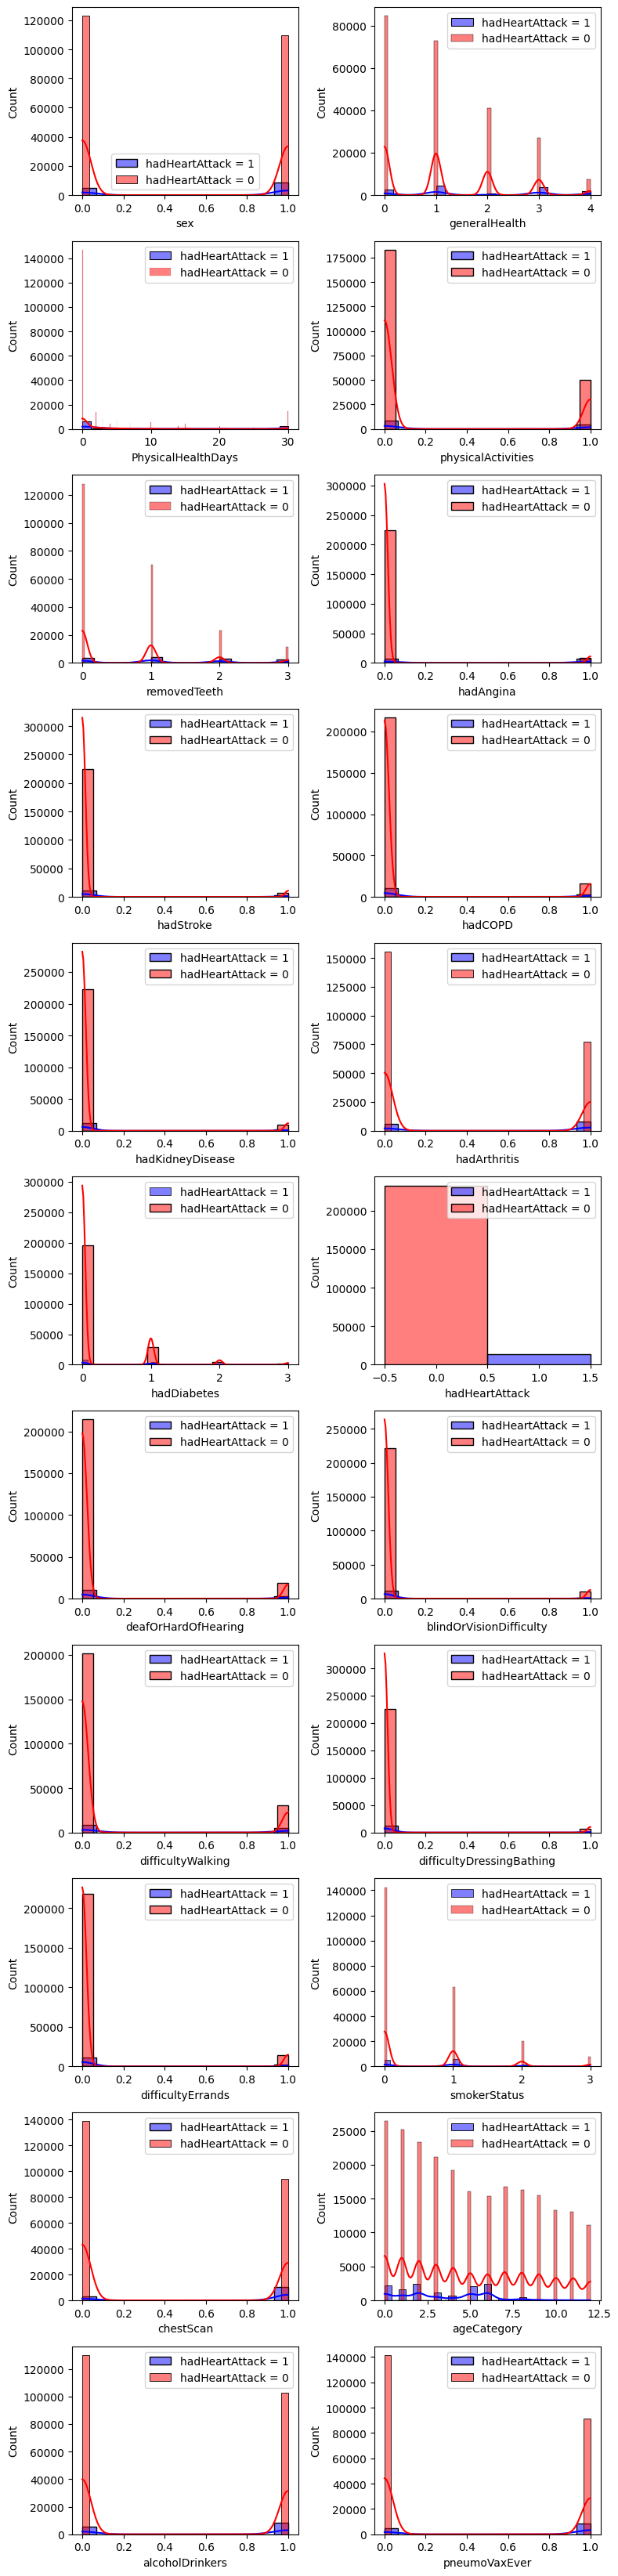

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


target_column = 'hadHeartAttack'

positive_class = data_pand[data_pand[target_column] == 1]
negative_class = data_pand[data_pand[target_column] == 0]

fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(8,33 ))
axes_list = axes.flat if isinstance(axes, np.ndarray) else [axes]

for i, column in enumerate(correlated_cols):
    sns.histplot(positive_class[column], ax=axes_list[i], label='hadHeartAttack = 1', color='blue', kde=True)
    sns.histplot(negative_class[column], ax=axes_list[i], label='hadHeartAttack = 0', color='red', kde=True)

    axes_list[i].set_xlabel(f'{column}')
    axes_list[i].legend()

plt.tight_layout()
plt.show()

In [21]:
#Save the data after preprocessing
csv_file_path = './transformed_heart_2022.csv'
data.coalesce(1).write.csv(csv_file_path, header=True, mode="overwrite")
